In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\Dataset\\Automobile_Loan.csv",low_memory=False)

In [3]:
#first few rows of dataset
df.head()

,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655054,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631354537,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355638717,0.2021,674.0,1.0,0


In [4]:
#check dataset's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [5]:
#number of rows, number of columns in dataset
df.shape

(121856, 40)

In [6]:
#drop [id] columns because it's not necessary
df.drop(columns=['ID', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag','Car_Owned','Mobile_Tag'], inplace=True)

In [7]:
# Convert multiple columns to numeric
columns_to_convert = ['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 
                      'Employed_Days', 'ID_Days','Score_Source_3','Registration_Days']

for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.to_csv("your_file_Updated.csv", index=False)

In [8]:
Cat_val = df.select_dtypes(include = ["object"]).columns
Num_val = df.select_dtypes(include = ["int32","int64","float32","float64"]).columns

Cat_val,Num_val

(Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
        'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
        'Client_Housing_Type', 'Client_Occupation', 'Type_Organization'],
       dtype='object'),
 Index(['Client_Income', 'Bike_Owned', 'Active_Loan', 'House_Own',
        'Child_Count', 'Credit_Amount', 'Loan_Annuity',
        'Population_Region_Relative', 'Age_Days', 'Employed_Days',
        'Registration_Days', 'ID_Days', 'Own_House_Age', 'Homephone_Tag',
        'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating',
        'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1',
        'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default',
        'Phone_Change', 'Credit_Bureau', 'Default'],
       dtype='object'))

In [9]:
df.dtypes

Client_Income                 float64
Bike_Owned                    float64
Active_Loan                   float64
House_Own                     float64
Child_Count                   float64
Credit_Amount                 float64
Loan_Annuity                  float64
Accompany_Client               object
Client_Income_Type             object
Client_Education               object
Client_Marital_Status          object
Client_Gender                  object
Loan_Contract_Type             object
Client_Housing_Type            object
Population_Region_Relative    float64
Age_Days                      float64
Employed_Days                 float64
Registration_Days             float64
ID_Days                       float64
Own_House_Age                 float64
Homephone_Tag                   int64
Workphone_Working               int64
Client_Occupation              object
Client_Family_Members         float64
Cleint_City_Rating            float64
Application_Process_Day       float64
Application_

In [10]:
#check the missing value
df.isna().sum().sort_values(ascending=False)

Own_House_Age                 80095
Score_Source_1                68835
Social_Circle_Default         61928
Client_Occupation             41435
Score_Source_3                26922
Credit_Bureau                 18540
ID_Days                        5985
Score_Source_2                 5686
Population_Region_Relative     4868
Loan_Annuity                   4826
Client_Income_Type             3701
Client_Housing_Type            3687
Employed_Days                  3666
Phone_Change                   3664
Application_Process_Hour       3663
House_Own                      3661
Loan_Contract_Type             3651
Client_Education               3645
Child_Count                    3638
Credit_Amount                  3637
Active_Loan                    3635
Registration_Days              3631
Bike_Owned                     3624
Client_Income                  3622
Age_Days                       3617
Type_Organization              3609
Client_Marital_Status          3473
Application_Process_Day     

In [11]:
#Remove all null values
df.dropna(axis=0, inplace=True)
df

,Client_Income,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,...,Application_Process_Day,Application_Process_Hour,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
12,27000.0,0.0,0.0,1.0,0.0,28440.00,1913.40,Alone,Service,Secondary,...,4.0,13.0,Self-employed,0.268014,0.684114,0.493863,0.1485,0.0,6.0,0
102,27000.0,0.0,0.0,1.0,3.0,53366.85,4003.20,Alone,Commercial,Secondary,...,4.0,10.0,Business Entity Type 3,0.477169,0.677447,0.581484,0.0330,1805.0,4.0,0
126,18000.0,0.0,1.0,1.0,1.0,27000.00,724.95,Alone,Service,Secondary,...,2.0,11.0,Transport: type 4,0.741930,0.642445,0.397946,0.1010,2268.0,0.0,0
161,18000.0,1.0,1.0,1.0,0.0,48149.55,3351.15,Alone,Service,Secondary,...,6.0,11.0,Self-employed,0.135435,0.470134,0.236611,0.0021,1753.0,7.0,0
189,15750.0,1.0,0.0,1.0,0.0,57340.80,2072.70,Alone,Service,Graduation,...,0.0,10.0,Construction,0.288840,0.272040,0.684828,0.0412,1198.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121684,9000.0,0.0,0.0,0.0,1.0,32590.80,1663.65,Alone,Service,Secondary,...,2.0,8.0,Business Entity Type 3,0.527100,0.510524,0.681706,0.0082,2634.0,3.0,0
121771,16650.0,0.0,0.0,1.0,0.0,51244.65,3741.75,Alone,Govt Job,Secondary,...,1.0,10.0,Postal,0.328439,0.677394,0.759712,0.0876,1420.0,7.0,0
121777,9900.0,1.0,1.0,1.0,1.0,76022.55,3028.05,Alone,Service,Secondary,...,0.0,12.0,Business Entity Type 3,0.634176,0.426885,0.770087,0.2278,0.0,1.0,0
121838,31500.0,0.0,0.0,1.0,1.0,94230.00,2767.95,Alone,Govt Job,Secondary,...,2.0,11.0,Military,0.306227,0.671083,0.450747,0.0825,1796.0,5.0,0


In [12]:
#check the missing value
df.isna().sum().sort_values(ascending=False)

Client_Income                 0
Application_Process_Hour      0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Type_Organization             0
ID_Days                       0
Score_Source_1                0
Score_Source_2                0
Score_Source_3                0
Social_Circle_Default         0
Phone_Change                  0
Credit_Bureau                 0
Own_House_Age                 0
Registration_Days             0
Bike_Owned                    0
Client_Income_Type            0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Education              0
Employed_Days                 0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_H

In [13]:
df.shape

(2633, 35)

In [14]:
#check for dupliate values
df.duplicated().sum()

129

In [15]:
#Drop duplicates
df = df.drop_duplicates()

In [16]:
#check for dupliate values after removing them
df.duplicated().sum()

0

In [17]:
#Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

In [18]:
#Encode Categorical Variables

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in Cat_val:
    if column in df_encoded.columns:  # Check if the column exists
        df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))
    else:
        print(f"Warning: {column} does not exist in the DataFrame")

In [19]:
print(df_encoded.head())

     Client_Income  Bike_Owned  Active_Loan  House_Own  Child_Count  \
12         27000.0         0.0          0.0        1.0          0.0   
102        27000.0         0.0          0.0        1.0          3.0   
126        18000.0         0.0          1.0        1.0          1.0   
161        18000.0         1.0          1.0        1.0          0.0   
189        15750.0         1.0          0.0        1.0          0.0   

     Credit_Amount  Loan_Annuity  Accompany_Client  Client_Income_Type  \
12        28440.00       1913.40                 0                   2   
102       53366.85       4003.20                 0                   0   
126       27000.00        724.95                 0                   2   
161       48149.55       3351.15                 0                   2   
189       57340.80       2072.70                 0                   2   

     Client_Education  ...  Application_Process_Day  Application_Process_Hour  \
12                  4  ...                     

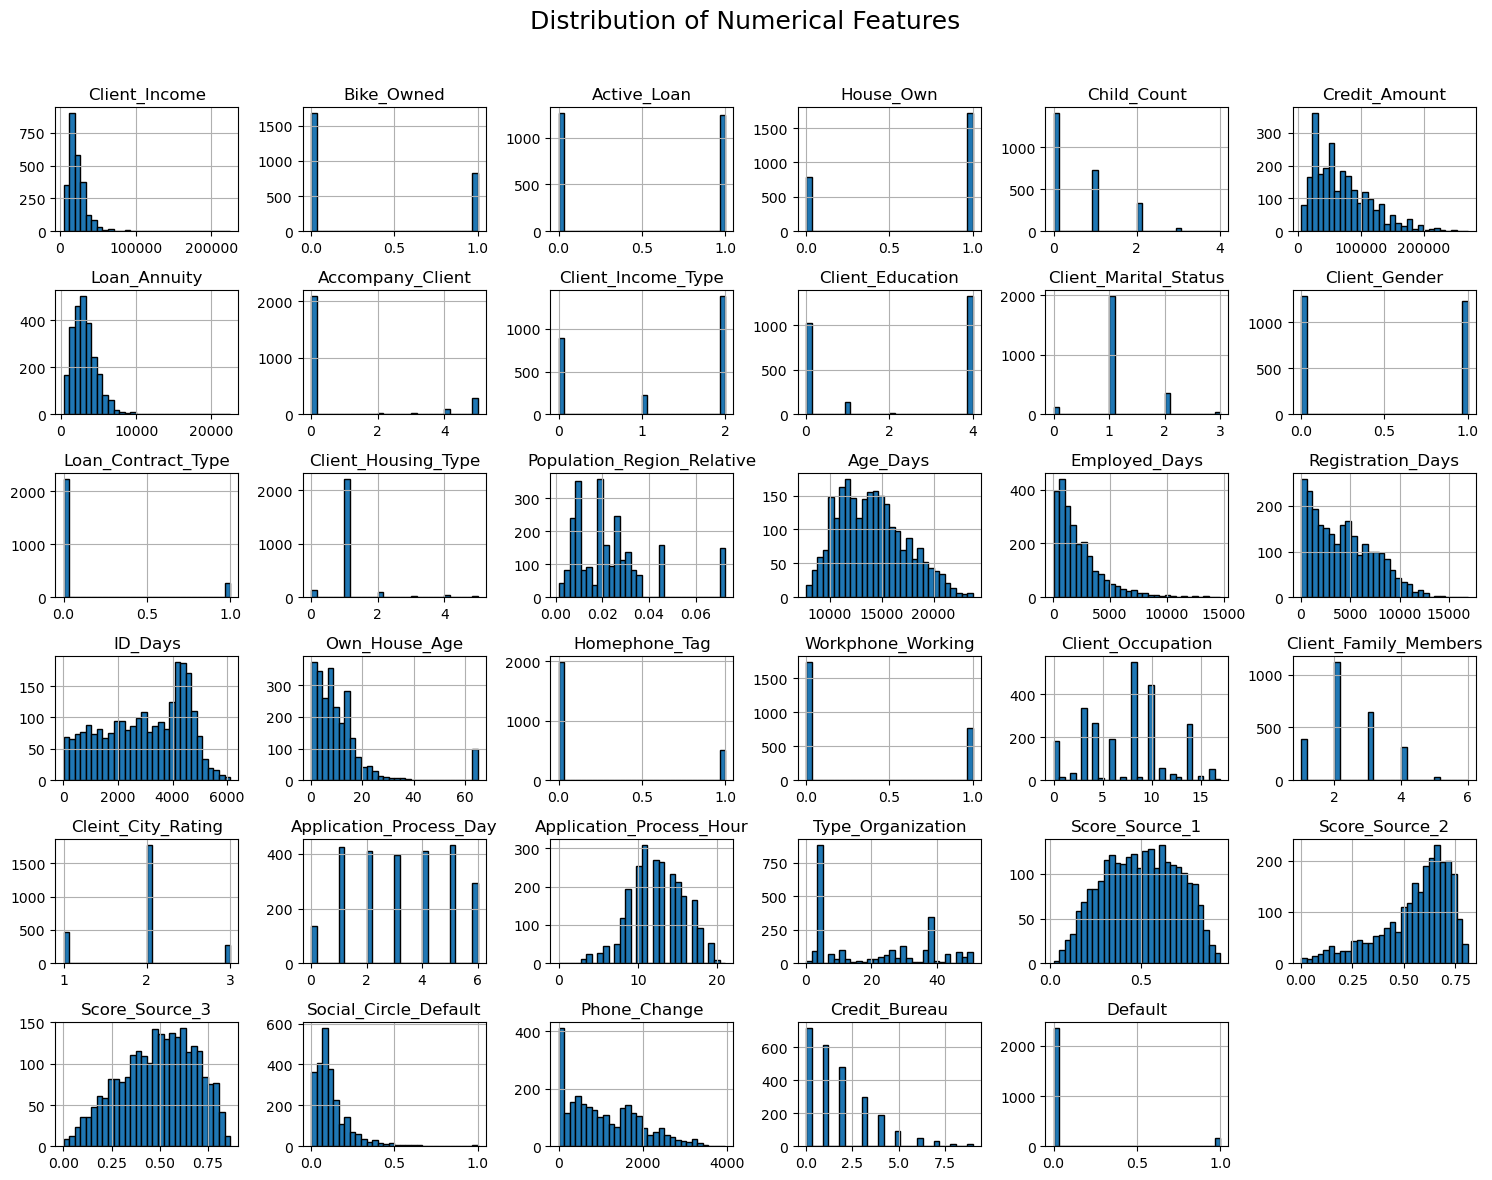

In [20]:
#Distribution of Numerical Features (Histograms)

import matplotlib.pyplot as plt

# Plot histograms for numerical features
df_encoded.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


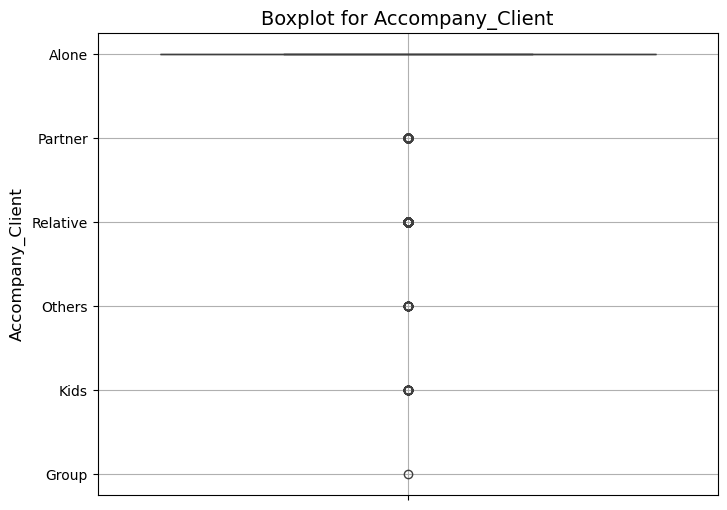

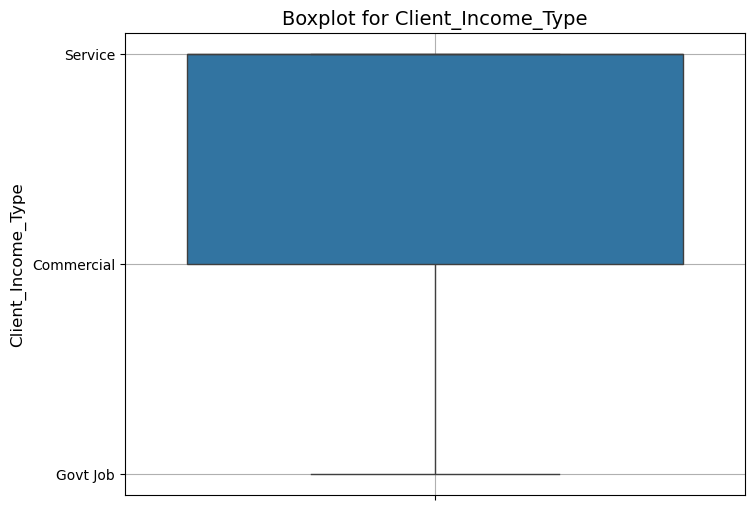

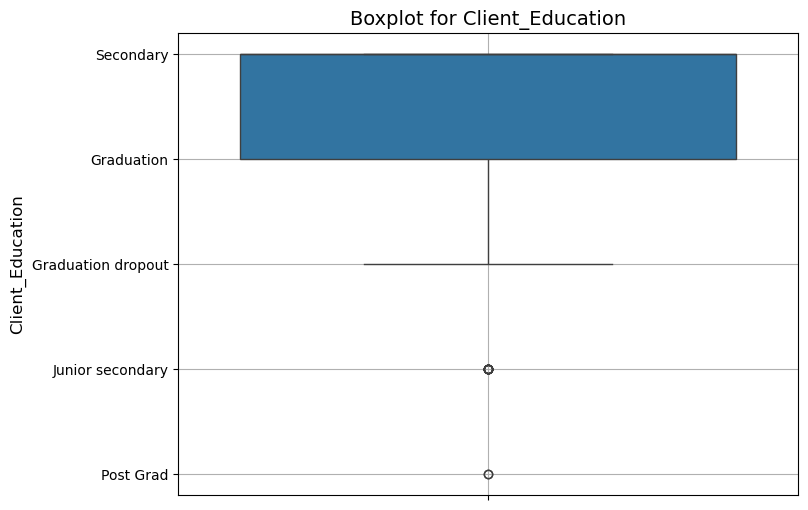

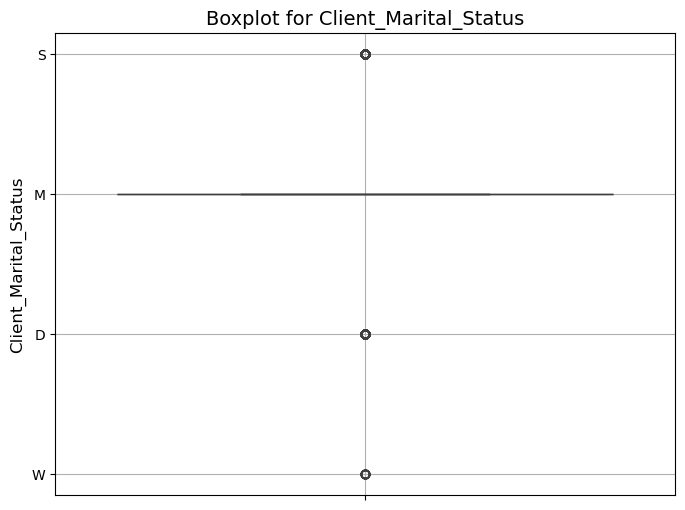

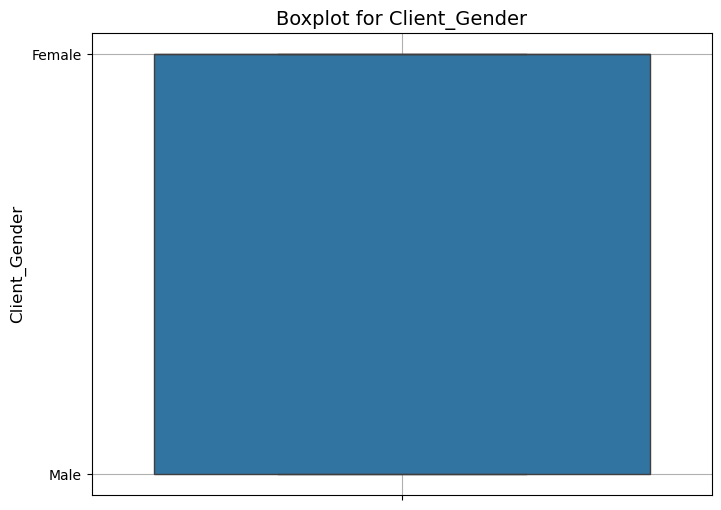

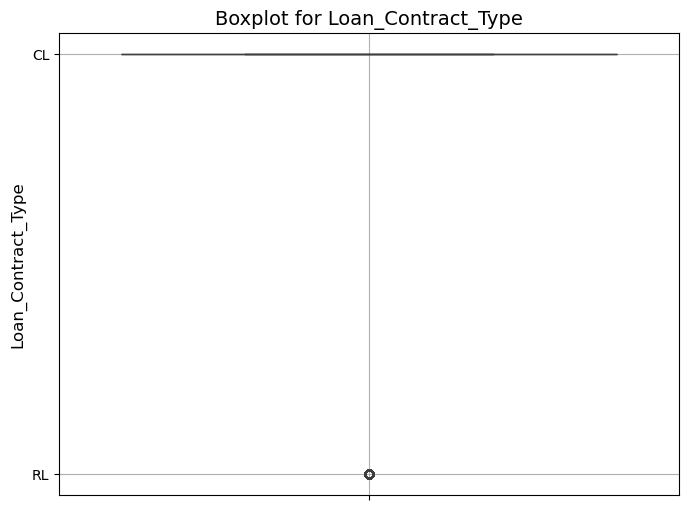

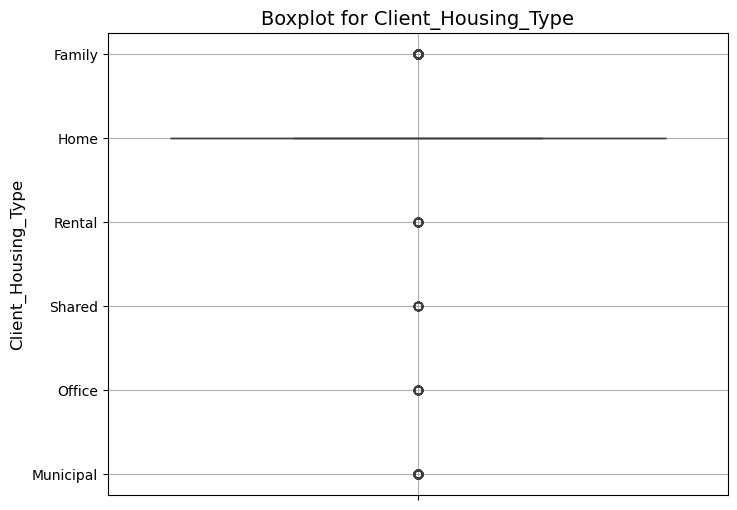

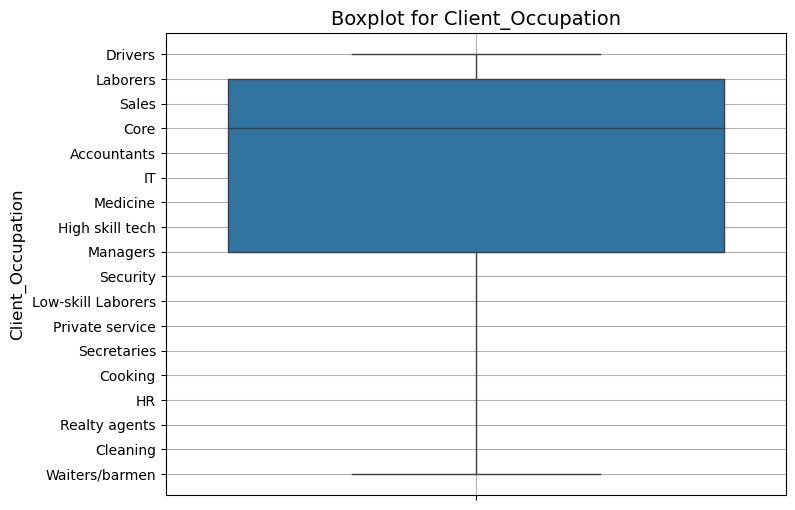

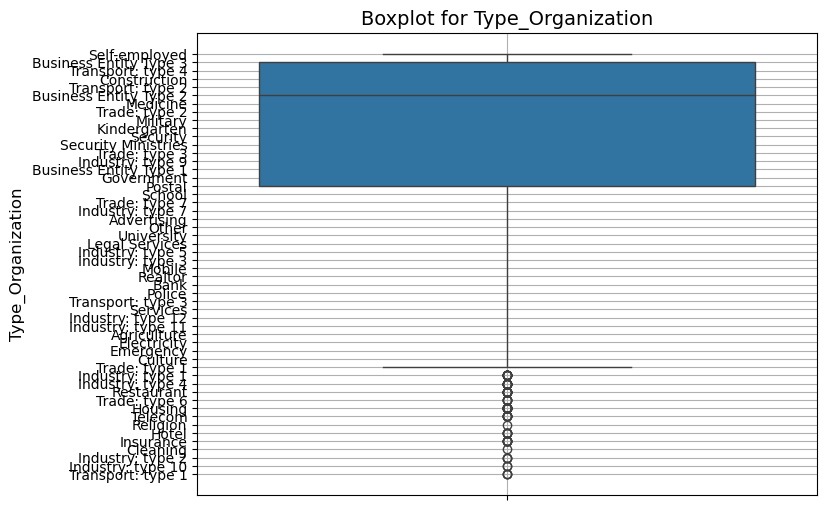

In [21]:
# Loop through each selected column to plot a boxplot

import seaborn as sns
import matplotlib.pyplot as plt

for feature in Cat_val:
    plt.figure(figsize=(8, 6)) 
    sns.boxplot(data=df, y=feature)  # Plot boxplot
    plt.title(f'Boxplot for {feature}', fontsize=14)  # Title 
    plt.ylabel(feature, fontsize=12)  # Label for y-axis
    plt.xlabel('')  # Clear x-axis label as it's not needed
    plt.grid(True)  # Add grid for better visualization
    plt.show()  # Display the plot


In [22]:
# Oversampling the data
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df_encoded.drop('Default', axis=1)  # Feature columns
y = df_encoded['Default']                # Target variable

# Check for negative values in features before SMOTE
print("Negative values before SMOTE:")
print((X < 0).sum())

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to create a balanced dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Default'] = y_resampled

# Check the new class distribution
print("Class distribution after SMOTE:")
print(df_balanced['Default'].value_counts())

# Check for negative values in features after SMOTE
print("Negative values after SMOTE:")
print((df_balanced.drop('Default', axis=1) < 0).sum())


Negative values before SMOTE:
Client_Income                 0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Type_Organization             0
Score_Source_1                0
Score_Source_2                0
Score_Sour

In [23]:
df_balanced.head

<bound method NDFrame.head of       Client_Income  Bike_Owned  Active_Loan  House_Own  Child_Count  \
0      27000.000000    0.000000     0.000000   1.000000     0.000000   
1      27000.000000    0.000000     0.000000   1.000000     3.000000   
2      18000.000000    0.000000     1.000000   1.000000     1.000000   
3      18000.000000    1.000000     1.000000   1.000000     0.000000   
4      15750.000000    1.000000     0.000000   1.000000     0.000000   
...             ...         ...          ...        ...          ...   
4691   36776.011265    0.000000     0.827553   1.000000     0.000000   
4692    7518.187635    1.000000     0.829292   0.170708     0.170708   
4693   11263.708659    0.030464     0.969536   1.000000     0.000000   
4694   33156.031817    1.000000     0.000000   1.000000     0.204448   
4695   26186.295995    0.000000     0.659588   1.000000     1.000000   

      Credit_Amount  Loan_Annuity  Accompany_Client  Client_Income_Type  \
0      28440.000000   1913.400

In [24]:
#OutLiers detection
from scipy.stats import zscore

#create a copy of the Dataframe to avoid modifying the original
df_copy= df_balanced.copy()

#Calculate Z-scores for each numeric column
numeric_columns = df_balanced.select_dtypes(include=[np.number]).columns
df_balanced[numeric_columns] = df_balanced[numeric_columns].apply(zscore)

#set a threshold for Z-score
threshold = 3

#Identify outliers based on Z-score
outliers = df_balanced[(np.abs(df_copy[numeric_columns]) > threshold).any(axis=1)]

print(outliers.count())

Client_Income                 4696
Bike_Owned                    4696
Active_Loan                   4696
House_Own                     4696
Child_Count                   4696
Credit_Amount                 4696
Loan_Annuity                  4696
Accompany_Client              4696
Client_Income_Type            4696
Client_Education              4696
Client_Marital_Status         4696
Client_Gender                 4696
Loan_Contract_Type            4696
Client_Housing_Type           4696
Population_Region_Relative    4696
Age_Days                      4696
Employed_Days                 4696
Registration_Days             4696
ID_Days                       4696
Own_House_Age                 4696
Homephone_Tag                 4696
Workphone_Working             4696
Client_Occupation             4696
Client_Family_Members         4696
Cleint_City_Rating            4696
Application_Process_Day       4696
Application_Process_Hour      4696
Type_Organization             4696
Score_Source_1      

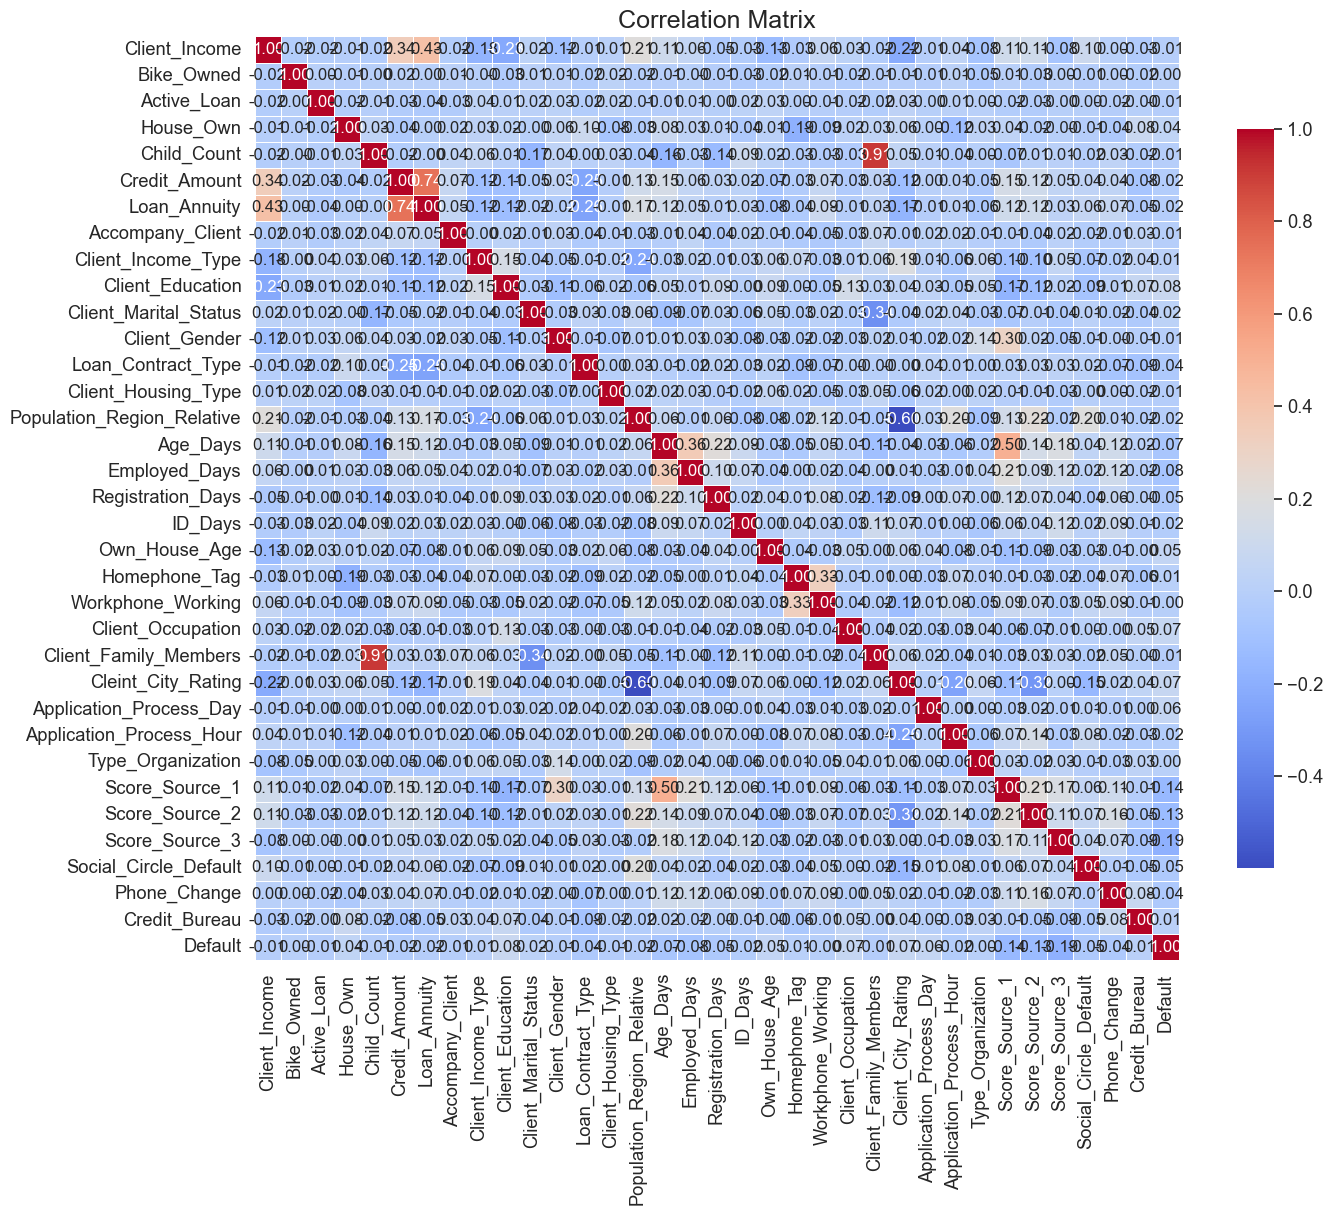

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = df_encoded.corr()

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))  # Increase the figure size

# Adjust the font size for better readability
sns.set(font_scale=1.2)

# Draw the heatmap 
heatmap = sns.heatmap(
    corr, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    square=True, 
    cbar_kws={"shrink": .8}, 
    linewidths=0.5,  # Add space between squares for clarity
    annot_kws={"size": 12}  # Increase the annotation font size
)

# Set title 
plt.title('Correlation Matrix', fontsize=18)
plt.show()


In [26]:
#Splitting the Data
from sklearn.model_selection import train_test_split

# Split the balanced dataset into features and target variable
X_balanced = df_balanced.drop('Default', axis=1)  # Features
y_balanced = df_balanced['Default']                # Target variable

# Split into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)


In [27]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)


Random Forest Accuracy: 0.98
Random Forest Confusion Matrix:
 [[464   6]
 [ 13 457]]
Random Forest Classification Report:
               precision    recall  f1-score   support

        -1.0       0.97      0.99      0.98       470
         1.0       0.99      0.97      0.98       470

    accuracy                           0.98       940
   macro avg       0.98      0.98      0.98       940
weighted avg       0.98      0.98      0.98       940



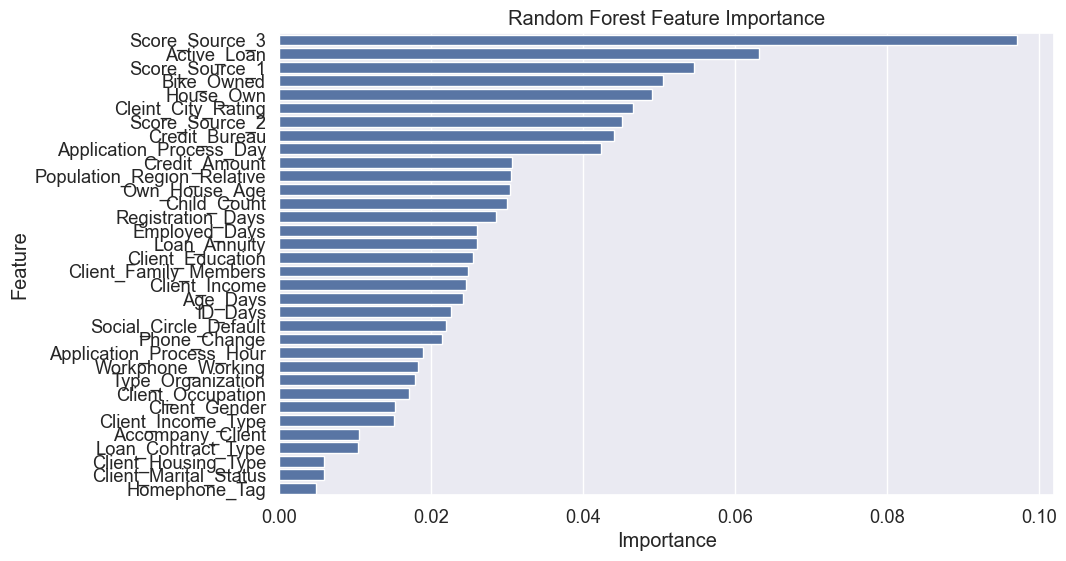

In [28]:
# RandomForest Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Use the original training set here
X_test_scaled = scaler.transform(X_test)         # Use the original test set here

# Convert to DataFrame for easy indexing
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Initialize the RandomForest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')

# Create confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print('Random Forest Confusion Matrix:\n', conf_matrix_rf)

# Classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print('Random Forest Classification Report:\n', class_report_rf)

# Get feature importances
importances = rf_model.feature_importances_

# Create a dataframe for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

Top Features: ['Score_Source_3', 'Active_Loan', 'Score_Source_1', 'Bike_Owned', 'House_Own', 'Cleint_City_Rating', 'Score_Source_2', 'Credit_Bureau', 'Application_Process_Day', 'Credit_Amount']
Random Forest (Top 10 Features) Accuracy: 0.96
Random Forest (Top 10 Features) Confusion Matrix:
 [[458  12]
 [ 23 447]]
Random Forest (Top 10 Features) Classification Report:
               precision    recall  f1-score   support

        -1.0       0.95      0.97      0.96       470
         1.0       0.97      0.95      0.96       470

    accuracy                           0.96       940
   macro avg       0.96      0.96      0.96       940
weighted avg       0.96      0.96      0.96       940



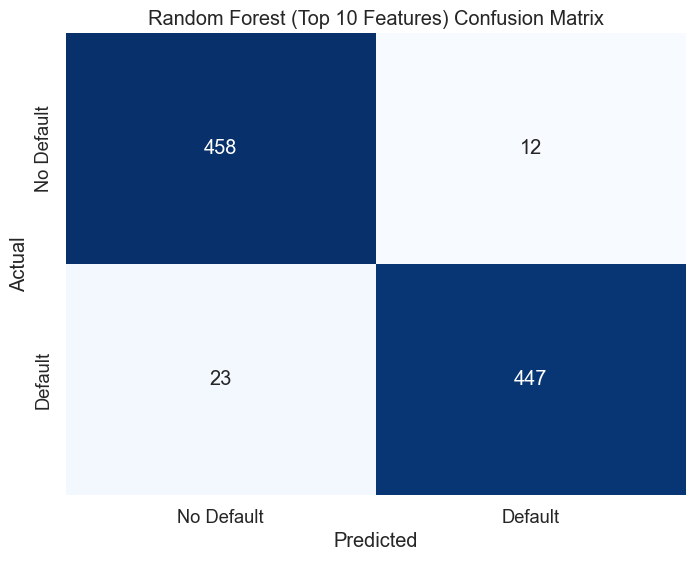

In [29]:
# Identify top features
n_top_features = 10
top_features = feature_importance_df.head(n_top_features)['Feature'].tolist()
print("Top Features:", top_features)

# Filter the training and testing sets for the top features
X_train_top10 = X_train_scaled[top_features]
X_test_top10 = X_test_scaled[top_features]

# Initialize a new RandomForestClassifier
rf_model_top10 = RandomForestClassifier(random_state=42)

# Train the model on the filtered training data
rf_model_top10.fit(X_train_top10, y_train)

# Make predictions on the filtered test data
y_pred_rf_top10 = rf_model_top10.predict(X_test_top10)

# Evaluate the new model
accuracy_rf_top10 = accuracy_score(y_test, y_pred_rf_top10)
print(f'Random Forest (Top 10 Features) Accuracy: {accuracy_rf_top10:.2f}')

# Create a new confusion matrix
conf_matrix_rf_top10 = confusion_matrix(y_test, y_pred_rf_top10)
print('Random Forest (Top 10 Features) Confusion Matrix:\n', conf_matrix_rf_top10)

# Classification report
class_report_rf_top10 = classification_report(y_test, y_pred_rf_top10)
print('Random Forest (Top 10 Features) Classification Report:\n', class_report_rf_top10)

# Plot confusion matrix for the new model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf_top10, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Random Forest (Top 10 Features) Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [30]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


Unique values in y_train before transformation: {1.0, -1.0}
Transformed unique values in y_train: {0.0, 1.0}
XGBoost Accuracy: 0.97
XGBoost Confusion Matrix:
 [[459  11]
 [ 15 455]]
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       470
         1.0       0.98      0.97      0.97       470

    accuracy                           0.97       940
   macro avg       0.97      0.97      0.97       940
weighted avg       0.97      0.97      0.97       940



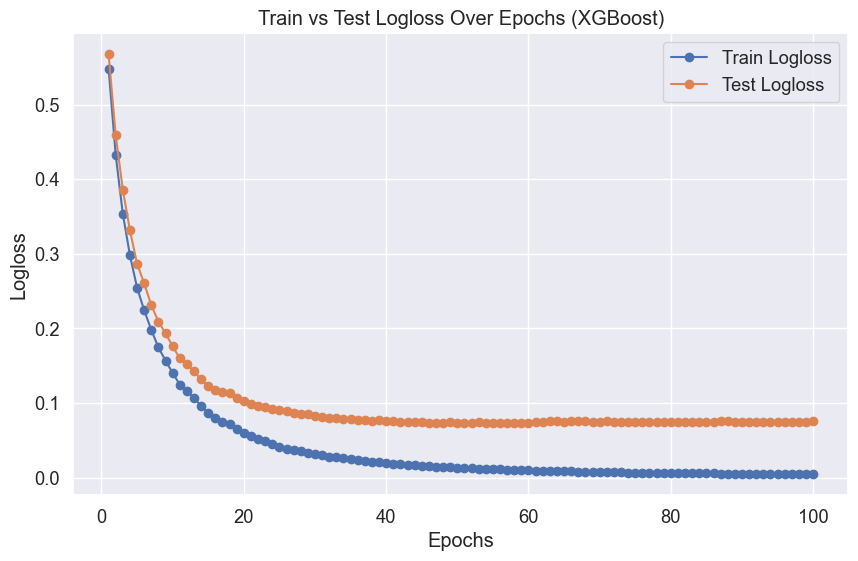

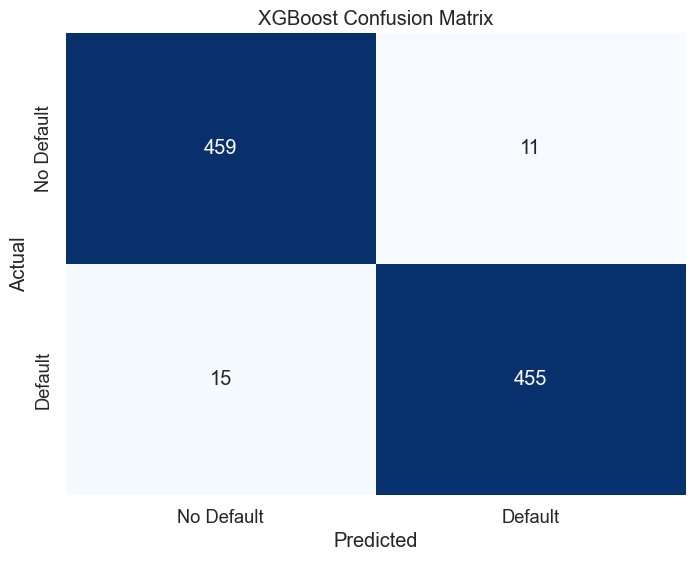

In [31]:
#XGBoost Classifier

# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the XGBoost classifier with logging for evaluation metrics
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric="logloss")

# Check unique values in y_train
print("Unique values in y_train before transformation:", set(y_train))

# Transform y_train and y_test if necessary (from -1, 1 to 0, 1)
y_train = (y_train + 1) / 2  # Transforms -1 to 0 and 1 to 1
y_test = (y_test + 1) / 2    # Same transformation for y_test

# Check unique values after transformation
print("Transformed unique values in y_train:", set(y_train))

# Create a watchlist to monitor training and testing performance
eval_set = [(X_train_scaled, y_train), (X_test_scaled, y_test)]

# Train the model on the training data and track logloss
xgb_model.fit(X_train_scaled, y_train, eval_set=eval_set, verbose=False)

# Extract the evaluation results
results = xgb_model.evals_result()

# Make predictions on the test data
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print('XGBoost Confusion Matrix:\n', conf_matrix_xgb)

# Classification report
class_report_xgb = classification_report(y_test, y_pred_xgb)
print('XGBoost Classification Report:\n', class_report_xgb)

# Plot Train vs Test Logloss Over Epochs
epochs = range(1, len(results['validation_0']['logloss']) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, results['validation_0']['logloss'], label='Train Logloss', marker='o')
plt.plot(epochs, results['validation_1']['logloss'], label='Test Logloss', marker='o')
plt.title('Train vs Test Logloss Over Epochs (XGBoost)')
plt.xlabel('Epochs')
plt.ylabel('Logloss')
plt.legend()
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Gradient Boosting Accuracy: 0.96
Gradient Boosting Confusion Matrix:
 [[457  13]
 [ 20 450]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       470
         1.0       0.97      0.96      0.96       470

    accuracy                           0.96       940
   macro avg       0.96      0.96      0.96       940
weighted avg       0.96      0.96      0.96       940



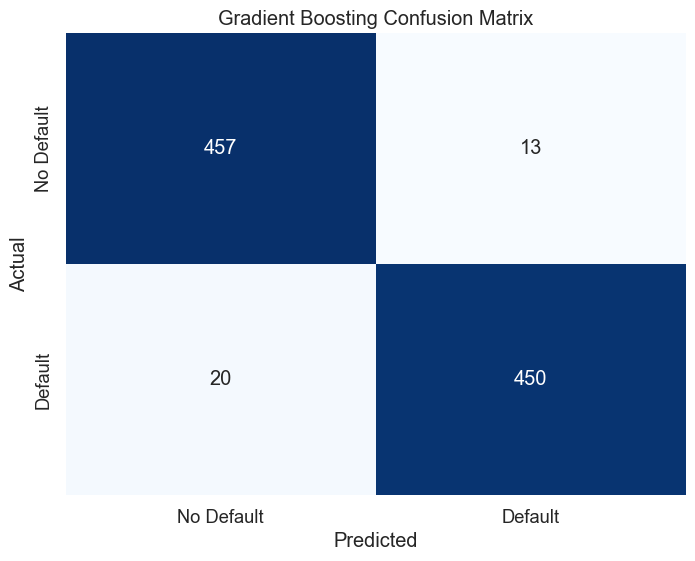

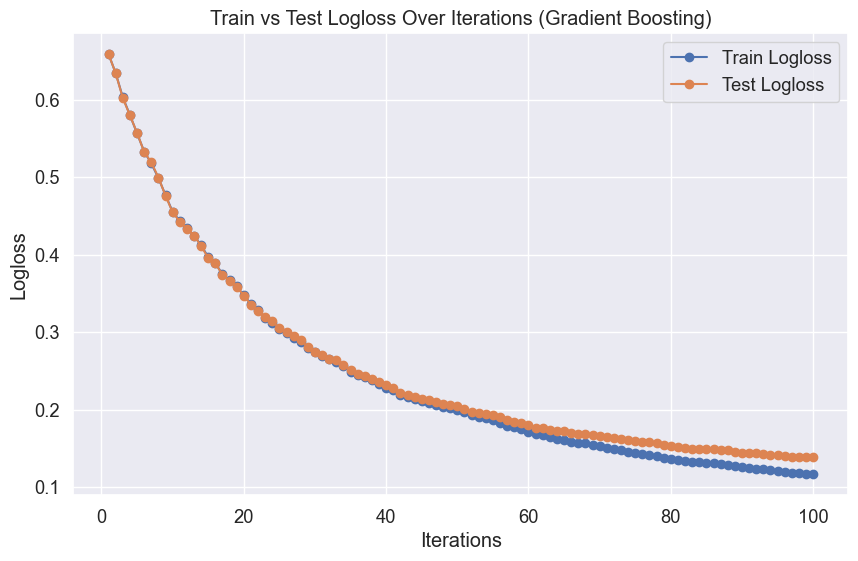

In [32]:
#Gradient Boosting Classifier

# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import seaborn as sns

# Initialize the Gradient Boosting classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gbc_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_gbc = gbc_model.predict(X_test_scaled)

# Evaluate the model
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
print(f'Gradient Boosting Accuracy: {accuracy_gbc:.2f}')

# Confusion matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
print('Gradient Boosting Confusion Matrix:\n', conf_matrix_gbc)

# Classification report
class_report_gbc = classification_report(y_test, y_pred_gbc)
print('Gradient Boosting Classification Report:\n', class_report_gbc)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbc, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gradient Boosting Log Loss per iteration (staged prediction)
log_loss_train = []
log_loss_test = []

# Get the predicted probabilities and compute log loss at each iteration
for y_train_pred_prob, y_test_pred_prob in zip(gbc_model.staged_predict_proba(X_train_scaled), 
                                               gbc_model.staged_predict_proba(X_test_scaled)):
    log_loss_train.append(log_loss(y_train, y_train_pred_prob))
    log_loss_test.append(log_loss(y_test, y_test_pred_prob))

# Plot Train vs Test Log Loss Over Iterations
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_loss_train) + 1), log_loss_train, label='Train Logloss', marker='o')
plt.plot(range(1, len(log_loss_test) + 1), log_loss_test, label='Test Logloss', marker='o')
plt.title('Train vs Test Logloss Over Iterations (Gradient Boosting)')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.legend()
plt.show()

SVM Accuracy: 0.95
SVM Confusion Matrix:
 [[435  35]
 [  8 462]]
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       470
         1.0       0.93      0.98      0.96       470

    accuracy                           0.95       940
   macro avg       0.96      0.95      0.95       940
weighted avg       0.96      0.95      0.95       940



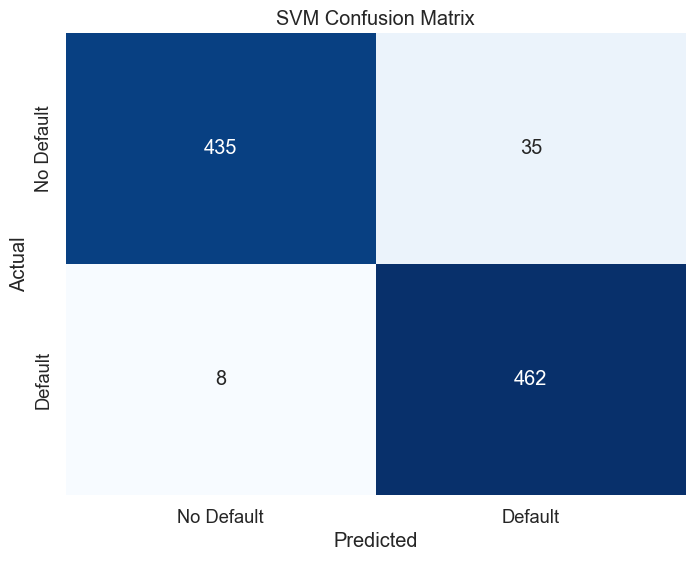

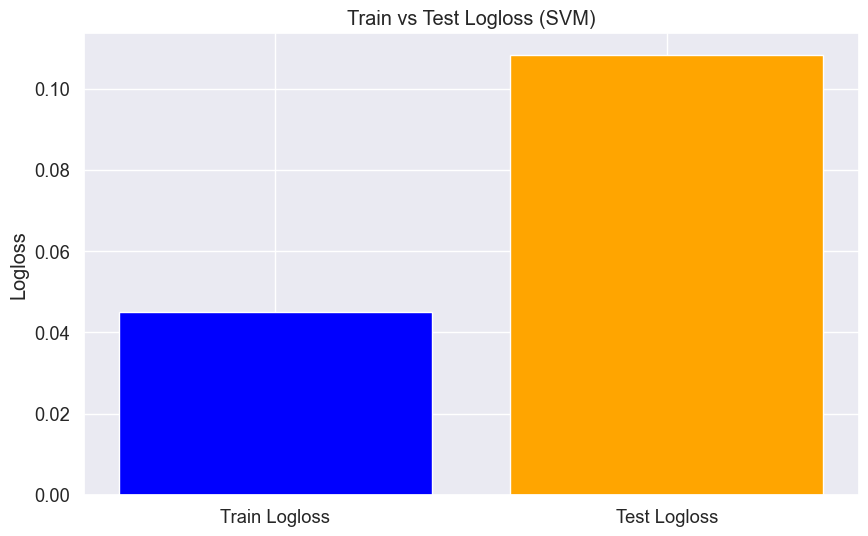

In [33]:
#SVM Model

# Import necessary libraries
from sklearn.svm import SVC

# Initialize the Support Vector Classifier (SVC) with probability=True for log loss
svc_model = SVC(probability=True, random_state=42)

# Train the model on the training data
svc_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_svc = svc_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'SVM Accuracy: {accuracy_svc:.2f}')

# Confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print('SVM Confusion Matrix:\n', conf_matrix_svc)

# Classification report
class_report_svc = classification_report(y_test, y_pred_svc)
print('SVM Classification Report:\n', class_report_svc)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SVM Log Loss per iteration
y_train_pred_prob_svc = svc_model.predict_proba(X_train_scaled)
y_test_pred_prob_svc = svc_model.predict_proba(X_test_scaled)

# Calculate Log Loss
log_loss_train_svc = log_loss(y_train, y_train_pred_prob_svc)
log_loss_test_svc = log_loss(y_test, y_test_pred_prob_svc)

# Plot Train vs Test Log Loss
plt.figure(figsize=(10, 6))
plt.bar(['Train Logloss', 'Test Logloss'], [log_loss_train_svc, log_loss_test_svc], color=['blue', 'orange'])
plt.title('Train vs Test Logloss (SVM)')
plt.ylabel('Logloss')
plt.show()


In [34]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


CatBoost Accuracy: 0.97
CatBoost Confusion Matrix:
 [[460  10]
 [ 17 453]]
CatBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       470
         1.0       0.98      0.96      0.97       470

    accuracy                           0.97       940
   macro avg       0.97      0.97      0.97       940
weighted avg       0.97      0.97      0.97       940



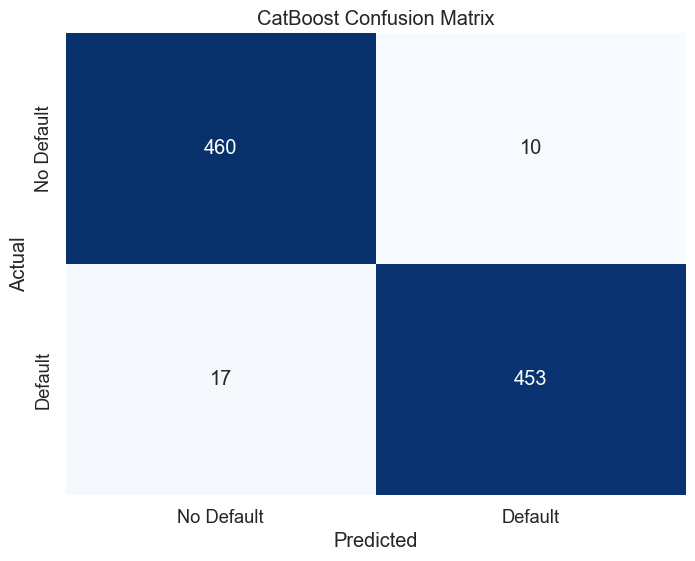

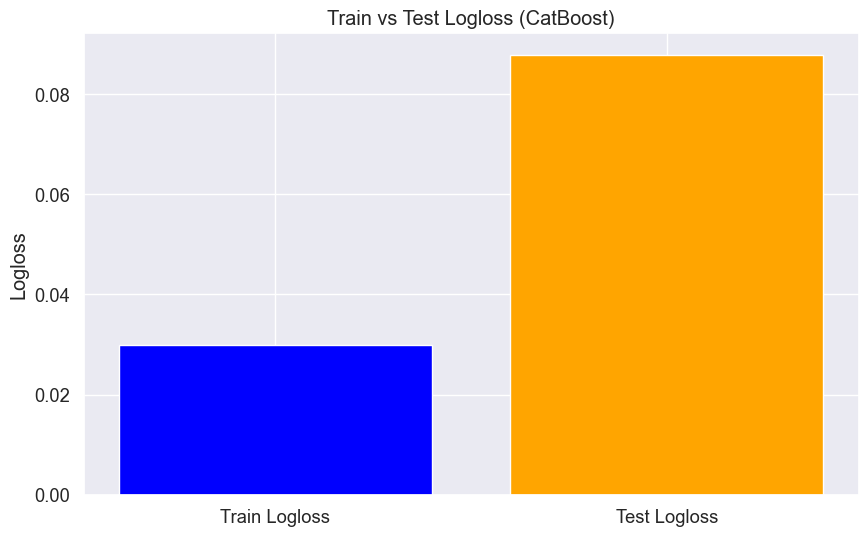

In [35]:
#CatBoost Classifier

# Import necessary libraries
from catboost import CatBoostClassifier

# Initialize the CatBoost Classifier
catboost_model = CatBoostClassifier(random_state=42, verbose=0)

# Train the model on the training data
catboost_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_catboost = catboost_model.predict(X_test_scaled)
y_pred_prob_catboost = catboost_model.predict_proba(X_test_scaled)

# Evaluate the model
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)
print(f'CatBoost Accuracy: {accuracy_catboost:.2f}')

# Confusion matrix
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
print('CatBoost Confusion Matrix:\n', conf_matrix_catboost)

# Classification report
class_report_catboost = classification_report(y_test, y_pred_catboost)
print('CatBoost Classification Report:\n', class_report_catboost)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_catboost, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate Log Loss
log_loss_train_catboost = log_loss(y_train, catboost_model.predict_proba(X_train_scaled))
log_loss_test_catboost = log_loss(y_test, catboost_model.predict_proba(X_test_scaled))

# Plot Train vs Test Log Loss
plt.figure(figsize=(10, 6))
plt.bar(['Train Logloss', 'Test Logloss'], [log_loss_train_catboost, log_loss_test_catboost], color=['blue', 'orange'])
plt.title('Train vs Test Logloss (CatBoost)')
plt.ylabel('Logloss')
plt.show()


Naive Bayes Accuracy: 0.78
Naive Bayes Confusion Matrix:
 [[327 143]
 [ 68 402]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.83      0.70      0.76       470
         1.0       0.74      0.86      0.79       470

    accuracy                           0.78       940
   macro avg       0.78      0.78      0.77       940
weighted avg       0.78      0.78      0.77       940



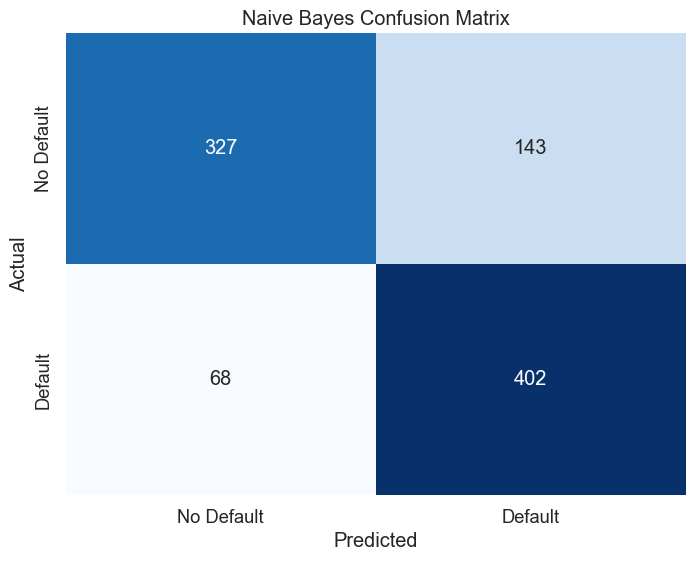

In [36]:
#Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_nb = nb_model.predict(X_test_scaled)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')

# Confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print('Naive Bayes Confusion Matrix:\n', conf_matrix_nb)

# Classification report
class_report_nb = classification_report(y_test, y_pred_nb)
print('Naive Bayes Classification Report:\n', class_report_nb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
feature_importance_df

,Feature,Importance
30,Score_Source_3,0.097174
2,Active_Loan,0.063127
28,Score_Source_1,0.054576
1,Bike_Owned,0.050534
3,House_Own,0.049132
24,Cleint_City_Rating,0.046584
29,Score_Source_2,0.045118
33,Credit_Bureau,0.044084
25,Application_Process_Day,0.042381
5,Credit_Amount,0.030594


Model Evaluation Matrix:
        Model  Accuracy  Precision  Recall  F1-Score
Random Forest    0.9800     0.9900  0.9700    0.9800
      XGBoost    0.9700     0.9800  0.9700    0.9700
GradientBoost    0.9600     0.9700  0.9600    0.9600
          SVM    0.9500     0.9300  0.9800    0.9600
     CatBoost    0.9700     0.9800  0.9600    0.9700
  Naive Bayes    0.7800     0.7400  0.8600    0.7900


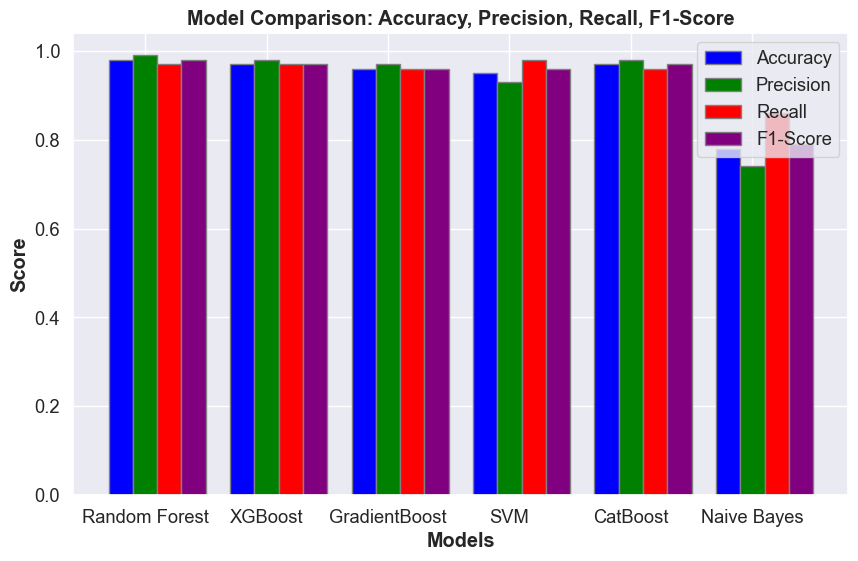

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define the evaluation metrics for each model
models = ['Random Forest', 'XGBoost', 'GradientBoost', 'SVM', 'CatBoost', 'Naive Bayes']

# Accuracy for each model 
accuracy = [0.98, 0.97, 0.96, 0.95, 0.97, 0.78]  

# Precision for each model 
precision = [0.99, 0.98, 0.97, 0.93, 0.98, 0.74]  

# Recall for each model 
recall = [0.97, 0.97, 0.96, 0.98, 0.96, 0.86]  

# F1-Score for each model (
f1_score = [0.98, 0.97, 0.96, 0.96, 0.97, 0.79] 

# Create the matrix with models and metrics
evaluation_matrix = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

# Print the evaluation matrix
print("Model Evaluation Matrix:")
print(evaluation_matrix.to_string(index=False, float_format="%.4f"))

# Vomparison Bar Plot
barWidth = 0.2
fig, ax = plt.subplots(figsize=(10, 6))

# Set position of bars on X axis
r1 = np.arange(len(models))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the bar plot
ax.bar(r1, accuracy, color='blue', width=barWidth, edgecolor='grey', label='Accuracy')
ax.bar(r2, precision, color='green', width=barWidth, edgecolor='grey', label='Precision')
ax.bar(r3, recall, color='red', width=barWidth, edgecolor='grey', label='Recall')
ax.bar(r4, f1_score, color='purple', width=barWidth, edgecolor='grey', label='F1-Score')

# Add labels and title
ax.set_xlabel('Models', fontweight='bold')
ax.set_ylabel('Score', fontweight='bold')
ax.set_title('Model Comparison: Accuracy, Precision, Recall, F1-Score', fontweight='bold')

# Set the x-ticks labels and positions
ax.set_xticks([r + barWidth for r in range(len(models))])
ax.set_xticklabels(models)

# Create legend
plt.legend()

# Show the plot
plt.show()


In [39]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import parallel_backend

# Assuming X_train, y_train are already defined and preprocessed

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],      # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required at each leaf node
}

# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Configure RandomizedSearchCV
random_search_rf = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=5,  # Number of parameter settings to sample
    cv=5,      # 5-fold cross-validation
    verbose=2, 
    random_state=42, 
    n_jobs=1  # Disable parallel processing to avoid serialization issues
)

# Use threading backend to avoid pickling issues
with parallel_backend('threading'):
    # Perform Randomized Search
    random_search_rf.fit(X_train, y_train)

# Save the best model to a .pkl file
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_search_rf.best_estimator_, file)

# Optionally, you can print the best parameters found
print("Best parameters found:", random_search_rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter

Best parameters found: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30}


In [40]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load your dataset
data = pd.read_csv('your_file_Updated.csv')  # Replace with your actual dataset path
X = data[['Score_Source_3', 'Active_Loan', 'Score_Source_1', 'Bike_Owned', 'House_Own', 'Score_Source_2', 'Credit_Bureau', 
           'Application_Process_Day', 'Credit_Amount', 
           'Population_Region_Relative', 'Own_House_Age', 'Child_Count', 
           'Registration_Days', 'Employed_Days']]
y = data['Default']  # Replace with your actual target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [41]:
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib  # Import joblib if you want to load a pre-trained model

# Define the user input
st.title('Loan Default Prediction')

# Add input fields for each feature
score_source_3 = st.number_input('Score Source 3', min_value=0.0)
active_loan = st.number_input('Active Loan', min_value=0)
score_source_1 = st.number_input('Score Source 1', min_value=0.0)
bike_owned = st.number_input('Bike Owned', min_value=0)
house_owned = st.number_input('House Owned', min_value=0)
client_city_rating = st.number_input('Client City Rating', min_value=0)
score_source_2 = st.number_input('Score Source 2', min_value=0.0)
credit_bureau = st.number_input('Credit Bureau', min_value=0)
application_process_day = st.number_input('Application Process Day', min_value=0)
credit_amount = st.number_input('Credit Amount', min_value=0.0)
population_region_relative = st.number_input('Population Region Relative', min_value=0)
own_house_age = st.number_input('Own House Age', min_value=0)
child_count = st.number_input('Child Count', min_value=0)
registration_days = st.number_input('Registration Days', min_value=0)
employed_days = st.number_input('Employed Days', min_value=0)

# Prepare the input data for prediction
input_data = pd.DataFrame([[score_source_3, active_loan, score_source_1, bike_owned, house_owned,
                            client_city_rating, score_source_2, credit_bureau,
                            application_process_day, credit_amount,
                            population_region_relative, own_house_age,
                            child_count, registration_days, employed_days]],
                           columns=['Score_Source_3', 'Active_Loan', 'Score_Source_1', 'Bike_Owned',
                                    'House_Own', 'Client_City_Rating', 'Score_Source_2',
                                    'Credit_Bureau', 'Application_Process_Day', 'Credit_Amount',
                                    'Population_Region_Relative', 'Own_House_Age', 'Child_Count',
                                    'Registration_Days', 'Employed_Days'])

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Load your trained model here if available
# rf_model = joblib.load('your_model_file.pkl')

# Create a button to trigger prediction
if st.button('Submit and Predict'):
    # Make predictions
    prediction = rf_model.predict(input_data)

    # Display the prediction
    result = 'Default' if prediction[0] == 1 else 'Not Default'
    st.write('Prediction:', result)


2024-10-03 23:50:25.837 
  command:

    streamlit run D:\Anaconda\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [ ]:
# Create a Streamlit app
code = """
import streamlit as st
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import joblib  # Import joblib if you want to load a pre-trained model

# Define the user input
st.title('Loan Default Prediction')

# Add input fields for each feature
score_source_3 = st.number_input('Score Source 3', min_value=0.0)
active_loan = st.number_input('Active Loan', min_value=0)
score_source_1 = st.number_input('Score Source 1', min_value=0.0)
bike_owned = st.number_input('Bike Owned', min_value=0)
house_owned = st.number_input('House Owned', min_value=0)
client_city_rating = st.number_input('Client City Rating', min_value=0)
score_source_2 = st.number_input('Score Source 2', min_value=0.0)
credit_bureau = st.number_input('Credit Bureau', min_value=0)
application_process_day = st.number_input('Application Process Day', min_value=0)
credit_amount = st.number_input('Credit Amount', min_value=0.0)
population_region_relative = st.number_input('Population Region Relative', min_value=0)
own_house_age = st.number_input('Own House Age', min_value=0)
child_count = st.number_input('Child Count', min_value=0)
registration_days = st.number_input('Registration Days', min_value=0)
employed_days = st.number_input('Employed Days', min_value=0)

# Prepare the input data for prediction
input_data = pd.DataFrame([[score_source_3, active_loan, score_source_1, bike_owned, house_owned,
                            client_city_rating, score_source_2, credit_bureau,
                            application_process_day, credit_amount,
                            population_region_relative, own_house_age,
                            child_count, registration_days, employed_days]],
                           columns=['Score_Source_3', 'Active_Loan', 'Score_Source_1', 'Bike_Owned',
                                    'House_Own', 'Client_City_Rating', 'Score_Source_2',
                                    'Credit_Bureau', 'Application_Process_Day', 'Credit_Amount',
                                    'Population_Region_Relative', 'Own_House_Age', 'Child_Count',
                                    'Registration_Days', 'Employed_Days'])

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Load your trained model here if available
# rf_model = joblib.load('your_model_file.pkl')

# Create a button to trigger prediction
if st.button('Submit and Predict'):
    # Make predictions
    prediction = rf_model.predict(input_data)

    # Display the prediction
    result = 'Default' if prediction[0] == 1 else 'Not Default'
    st.write('Prediction:', result)
"""

with open("app.py", "w") as f:
    f.write(code)

# Run the Streamlit app (this will block the cell until you stop the app)
!streamlit run app.py
